## Select the features that will be used for with classification algorithms

Carry out an analysis of the dataset features to identify the features suitable for modelling

The following steps were used to identify the features

- 1 Remove the target attribute from the dataset and create a separate dataset for the target values
- 2 Carry out a correlation check on the remaining features
- 3 Remove any features with a high correlation


### 1 Remove the target attribute from the dataset and create a separate dataset for the target values

In [15]:
#remove the label/attribute to be predicted from the dataset and create a dataset with only label/attribute values

combined_no_label_data = new_numeric_dataset.drop(columns=['drivingStyle'])

combined_y_values = new_numeric_dataset["drivingStyle"]

### 2 Carry out a correlation check on the remaining features

In [16]:
#carry out a correlation check on the features without the label/attribute data column

correlation_matrix = combined_no_label_data.corr()

print(correlation_matrix)

                           AltitudeVariation  VehicleSpeedInstantaneous  \
AltitudeVariation                   1.000000                   0.025686   
VehicleSpeedInstantaneous           0.025686                   1.000000   
VehicleSpeedAverage                 0.048478                   0.866498   
VehicleSpeedVariance               -0.105758                  -0.053592   
VehicleSpeedVariation              -0.010947                   0.042321   
LongitudinalAcceleration            0.078638                   0.032702   
EngineLoad                          0.140614                   0.274541   
EngineCoolantTemperature           -0.008737                   0.238313   
ManifoldAbsolutePressure            0.100117                   0.718048   
EngineRPM                          -0.014907                   0.839177   
MassAirFlow                         0.035037                   0.814967   
IntakeAirTemperature                0.095514                   0.346339   
VerticalAcceleration     

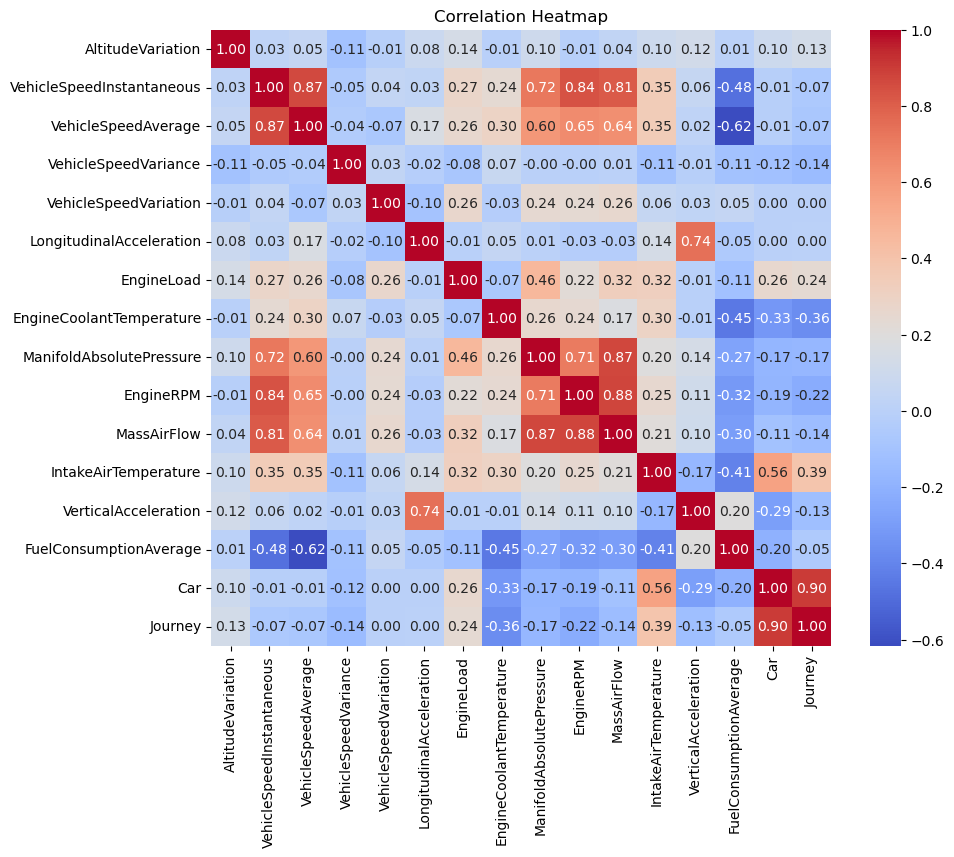

In [17]:
#create a heatmap showing the correlation using seaborn 

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#identify the features that have a strong correlation over 80%

correlation_matrix[(correlation_matrix >0.8) | (correlation_matrix <-0.8)]

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey
AltitudeVariation,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleSpeedInstantaneous,NaN,1.000000,0.866498,NaN,NaN,NaN,NaN,NaN,NaN,0.839177,0.814967,NaN,NaN,NaN,NaN,NaN
VehicleSpeedAverage,NaN,0.866498,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleSpeedVariance,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleSpeedVariation,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LongitudinalAcceleration,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineLoad,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineCoolantTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ManifoldAbsolutePressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.871376,NaN,NaN,NaN,NaN,NaN
EngineRPM,NaN,0.839177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.875078,NaN,NaN,NaN,NaN,NaN


Pairs with Correlation Higher than 0.8:

VehicleSpeedAverage & VehicleSpeedInstantaneous (0.866498)
VehicleSpeedInstantaneous & MassAirFlow (0.814967)
VehicleSpeedInstantaneous & EngineRPM (0.839177)
ManifoldAbsolutePressure & MassAirflow (0.871376)
MassAirflow & EngineRPM (0.875078)
We could use SelectKBest to identify which feature to drop but using a manual process for the moment.

Remove EngineRPM as it correlates with VehicleSpeedInstantenous & ManifoldAbsolutePressure & MassAirFlow

Remove MassAirFlow as it correlates with VehicleSpeedInstantenous & ManifoldAbsolutePressure &EngineRPM

High positive correlation (close to 1) indicates that the features are providing similar information

### 3 Remove any features with a high correlation

In [19]:
#remove the features MassAirFlow & EngineRPM from the dataset

new_dataset = combined_no_label_data.drop(['MassAirFlow', 'EngineRPM'], axis = 1)

new_dataset

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,24.0,-0.1133,19.497335,0,1
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,22.0,-0.1289,19.515722,0,1
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,21.0,-0.1328,19.441765,0,1
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,20.0,-0.0859,19.388769,0,1
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,21.0,-0.0664,19.301638,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23765,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81.0,115.0,25.0,-0.1661,14.578003,1,4
23766,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81.0,106.0,25.0,-0.1987,14.585642,1,4
23767,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81.0,106.0,24.0,-0.1156,14.547294,1,4
23768,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80.0,112.0,23.0,-0.0760,14.546828,1,4


In [20]:
#assess the statistical values after the feature removal 

new_dataset.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,Car,Journey
count,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000
mean,-0.263046,38.638035,38.816170,171.939087,-0.020558,0.681640,36.762356,70.818721,115.195120,23.483004,0.463680,15.171096,0.531763,2.422718
std,2.091480,33.865298,31.150484,182.766096,2.475745,1.583075,26.640593,15.685020,20.455268,10.902487,3.463054,4.603774,0.499001,1.100154
min,-24.600006,0.000000,0.000000,0.000000,-103.500000,-3.065000,0.000000,12.000000,88.000000,7.000000,-2.763100,7.271883,0.000000,1.000000
25%,-1.399998,11.700000,15.996519,46.048954,-0.900001,-0.219000,18.823530,63.000000,102.000000,16.000000,-0.553675,11.672288,0.000000,1.000000
50%,-0.099998,31.500000,29.325470,113.972026,0.000000,0.390700,31.372549,79.000000,107.000000,19.000000,-0.078100,14.520122,1.000000,3.000000
75%,0.700001,54.899998,50.159999,230.217960,0.900002,1.159850,58.431374,81.000000,120.000000,31.000000,0.237450,18.288337,1.000000,3.000000
max,11.400002,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,65.000000,17.944800,45.336861,1.000000,4.000000
